In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [4]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")

In [5]:
train_preprocessed=pd.read_csv("train_preprocessed.csv")
test_preprocessed=pd.read_csv("test_preprocessed.csv")

In [6]:
train_preprocessed.head()

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [8]:
test_preprocessed=test_preprocessed.drop(['Selling_Price'], axis=1)

In [9]:
test_preprocessed.head()

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Product_Category_Technology,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,1,0,0,0,0,1,0,0,0,0,...,0,39.0,205,0,90,0.0,380.0,16.0,2576.0,3340.0
1,0,1,0,0,0,1,0,0,0,0,...,0,49.0,3,0,87,0.0,393.0,16.0,1202.0,1955.0
2,1,0,0,0,0,0,0,0,0,0,...,1,1.0,183,2,55,0.0,493.0,9.0,7175.0,15715.0
3,0,1,1,0,0,0,0,0,0,0,...,0,8.0,358,3,86,0.0,303.0,16.0,5404.0,13078.0
4,1,0,0,0,0,0,0,0,0,0,...,1,33.0,167,0,27,0.0,567.0,16.0,4069.0,6244.0


In [10]:
model = LinearRegression()

In [11]:
X = train_preprocessed.drop(columns=["Selling_Price"])

In [12]:
y = train_preprocessed["Selling_Price"]

In [13]:
model.fit(X,y)

LinearRegression()

In [14]:
mean_squared_error(y, model.predict(X),squared=False)

981.6606155863701

In [15]:
X_test = test_preprocessed

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([ 3578.4674397 ,  2290.23849468, 11112.93204297, ...,
        5425.07936711,  3612.5945471 ,  2165.32718507])

In [18]:
Result=pd.DataFrame()

In [19]:
Result["Product_id"]  = test["Product_id"]

In [23]:
Result["Selling_Price"]  = abs(y_pred)

In [24]:
Result

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3578.467440
1,ACCEGCATKHNRXUHW,2290.238495
2,NKCE6GJ5XVJDXNNZ,11112.932043
3,NKCEB8BK3ZXDHDHM,8967.268918
4,TOPEFDXSAHRNPF94,5610.269462
...,...,...
3425,BBAE9K7BXFUTDNBK,4014.234912
3426,RTRDYPA4PJHCJCGF,8615.233095
3427,TUNE8FWQBS7TVVT7,5425.079367
3428,NKCEGMUABCRGUZPE,3612.594547


In [25]:
Result.to_csv("linear_regression_result.csv", index = False)

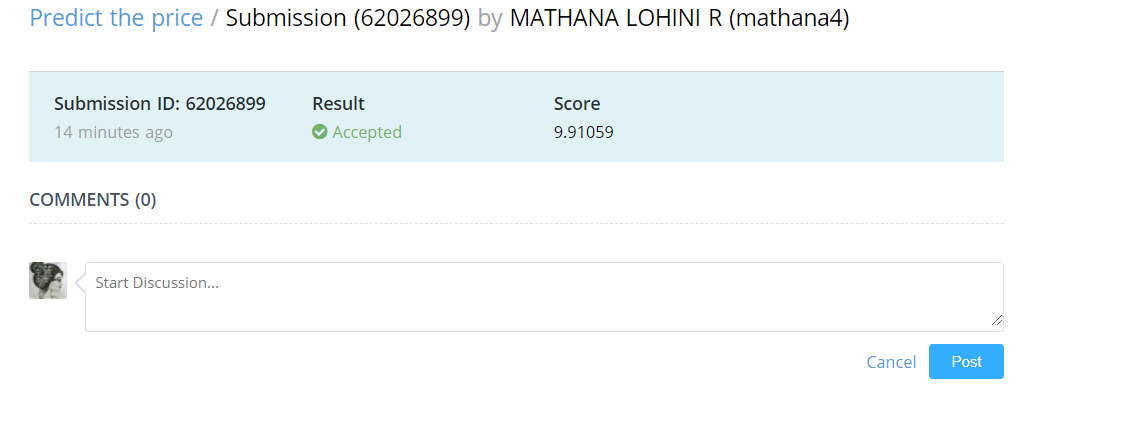

In [26]:
from IPython.display import Image
Image(filename='LinearRegressionResult.png')

In [40]:
sample_test= pd.read_csv("sample_test.csv")

In [41]:
sample_test

,Product_id


In [42]:
sample_test["Product_id"]=test["Product_id"]

In [43]:
sample_test

,Product_id
0,SCHE4YSTDVPVZVXW
1,ACCEGCATKHNRXUHW
2,NKCE6GJ5XVJDXNNZ
3,NKCEB8BK3ZXDHDHM
4,TOPEFDXSAHRNPF94
...,...
3425,BBAE9K7BXFUTDNBK
3426,RTRDYPA4PJHCJCGF
3427,TUNE8FWQBS7TVVT7
3428,NKCEGMUABCRGUZPE


In [47]:
def model_fit(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_test['Selling_Price'] = np.abs(test_pred)
    sample_test.to_csv(filename, index = False)
    return mean_squared_error(train_y, train_pred, squared=False)
        
    

In [48]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

In [49]:
for i in model:
    print(i)
    model_fit(i, X, y, X_test, sample_test, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE :  930.2078050577649
Ridge()
Train RMSE :  930.4991601808347
Lasso()
Train RMSE :  930.7324092181271
ElasticNet()
Train RMSE :  1576.0658349894036
KNeighborsRegressor()
Train RMSE :  1581.9245971913501


# RESULT

## Linear Regression

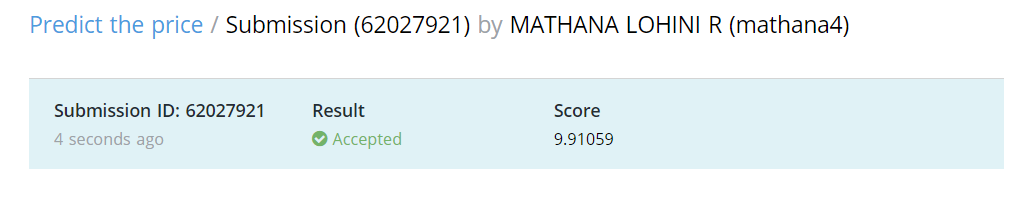

In [52]:
Image(filename='LinearRegression2.png')

## Ridge

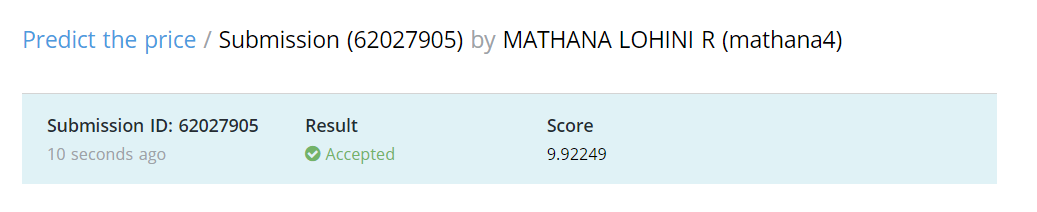

In [51]:
Image(filename='RidgeResult.png')

## Lasso

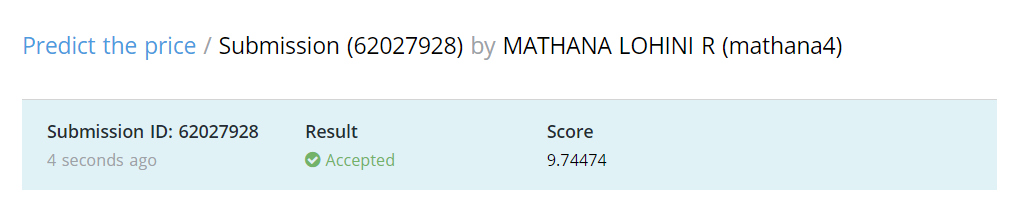

In [53]:
Image(filename='LassoResult.png')

## ElasticNet

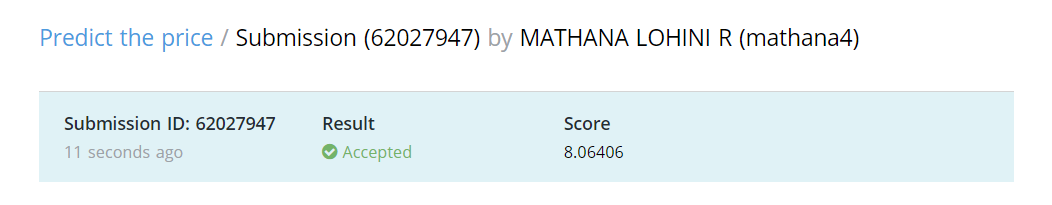

In [54]:
Image(filename='ElasticNetResult.png')

## KNeighborsRegressor

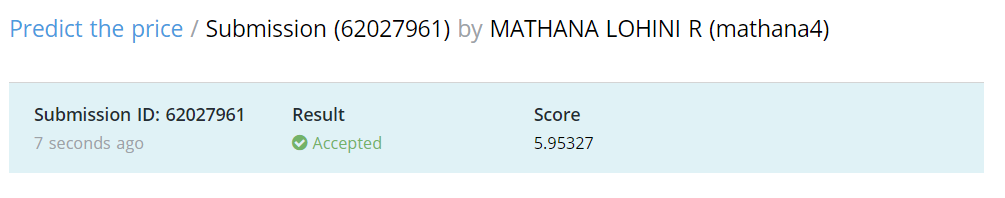

In [55]:
Image(filename='KNNResult.png')